In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

In [62]:
input = torch.rand(1, 3,32,32)
print(input.shape)

torch.Size([1, 3, 32, 32])


In [63]:
layer1 = nn.Conv2d(3,6,kernel_size=5,stride=1)
x = layer1(input)
print(x.shape)

layer2 = nn.Tanh()
x = layer2(x)
print(x.shape)

layer3 = nn.AvgPool2d(kernel_size=2,stride=2)
x = layer3(x)
print(x.shape)

layer4 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
x = layer4(x)
print(x.shape)

layer5 = nn.Tanh()
x = layer5(x)
print(x.shape)

layer6 = nn.AvgPool2d(kernel_size=2, stride=2)
x = layer6(x)
print(x.shape)

layer7 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
x = layer7(x)
print(x.shape)

x = x.view(x.size(0), -1)

print(x.shape)

layer8 = nn.Linear(in_features=120, out_features=84)
x = layer8(x)
print(x.shape)

layer9 = nn.Linear(in_features=84, out_features=10)
x = layer9(x)
print(x.shape)

torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 14, 14])
torch.Size([1, 16, 10, 10])
torch.Size([1, 16, 10, 10])
torch.Size([1, 16, 5, 5])
torch.Size([1, 120, 1, 1])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 10])


In [67]:
layer10 = nn.Softmax()
x = layer10(x)
print(x)

tensor([[0.1083, 0.0905, 0.1073, 0.0896, 0.1041, 0.1074, 0.1010, 0.0928, 0.0951,
         0.1038]], grad_fn=<SoftmaxBackward0>)


C:\Users\Penguin\AppData\Local\Temp\ipykernel_7380\1909681734.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = layer10(x)


In [71]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh(),
        )
        
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh()
        )

        self.fc2 = nn.Linear(in_features=84, out_features=10)

        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [72]:
input = torch.rand(1, 3,32,32)
model = LeNet()
output = model(input)
print(output)

tensor([[0.1009, 0.0981, 0.0963, 0.0930, 0.0950, 0.1191, 0.1022, 0.1001, 0.0947,
         0.1007]], grad_fn=<SoftmaxBackward0>)


C:\Users\Penguin\AppData\Local\Temp\ipykernel_7380\1364427488.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


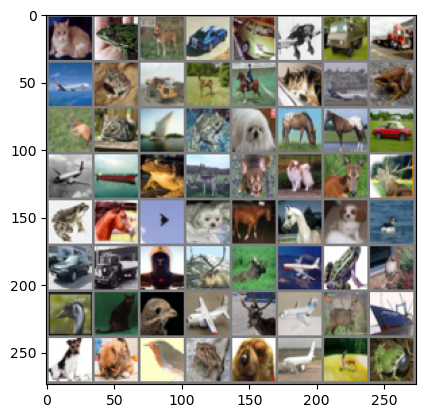

cat   frog  dog   car   car   plane truck truck plane frog  truck deer  horse cat   plane frog  deer  cat   ship  frog  dog   horse horse car   plane ship  frog  deer  dog   dog   deer  deer  frog  horse plane dog   horse horse dog   bird  car   truck plane deer  deer  plane frog  bird  bird  cat   bird  plane deer  plane deer  ship  dog   dog   bird  frog  dog   plane deer  frog 


In [75]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train = datasets.CIFAR10(root="../data/", train=True, download=False, transform=transform)
trainloader = DataLoader(train, batch_size=batch_size, shuffle=True)

test = datasets.CIFAR10(root="../data/", train=False, download=False, transform=transform)
testloader = DataLoader(test, batch_size=batch_size, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [76]:
def test_model(model, testloader, device):
    model.eval()
    total_accuracy = 0.0
    total = 0

    with torch.no_grad():
        for images, labels in testloader:
            images,labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_accuracy += (predicted == labels).sum().item()

    model.train()
    
    return total_accuracy/total

In [77]:
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

learning_rate = 0.01
epochs = 20

model = LeNet()
model = model.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

#Train
loss_arr = []
accuracy_arr = []

for i in range(epochs):

    total_accuracy = 0.0

    for j,[image,label] in enumerate(tqdm(trainloader, desc=f'Epoch {i+1}/{epochs}')):
        x = image.to(device)
        y_= label.to(device)

        output = model.forward(x)
        loss = loss_func(output,y_)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_accuracy = calculate_accuracy(output, y_)
        total_accuracy += batch_accuracy

    avg_accuracy = total_accuracy / len(trainloader)
    accuracy_arr.append(avg_accuracy)

    test_accuracy = test_model(model, testloader, device)

    print(f'Epoch {i+1}/{epochs}, Loss: {loss}, Train Accuracy: {avg_accuracy * 100:.2f}%, Test_Accracy: {test_accuracy*100:.2f}%')
    loss_arr.append(loss.cpu().detach().numpy())

model_path = 'LeNet.pth'

torch.save({
    'epoch': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss_arr,
    }, model_path)

Epoch 1/20:   0%|          | 0/782 [00:00<?, ?it/s]C:\Users\Penguin\AppData\Local\Temp\ipykernel_7380\1364427488.py:38: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)
Epoch 1/20: 100%|██████████| 782/782 [00:08<00:00, 93.30it/s] 


Epoch 1/20, Loss: 2.139380693435669, Train Accuracy: 24.59%, Test_Accracy: 27.38%


Epoch 2/20: 100%|██████████| 782/782 [00:04<00:00, 157.26it/s]


Epoch 2/20, Loss: 2.1810667514801025, Train Accuracy: 28.10%, Test_Accracy: 29.81%


Epoch 3/20: 100%|██████████| 782/782 [00:04<00:00, 165.66it/s]


Epoch 3/20, Loss: 2.2716121673583984, Train Accuracy: 28.57%, Test_Accracy: 30.40%


Epoch 4/20: 100%|██████████| 782/782 [00:04<00:00, 163.37it/s]


Epoch 4/20, Loss: 2.0812134742736816, Train Accuracy: 29.16%, Test_Accracy: 30.74%


Epoch 5/20: 100%|██████████| 782/782 [00:04<00:00, 162.22it/s]


Epoch 5/20, Loss: 2.1602368354797363, Train Accuracy: 30.46%, Test_Accracy: 31.11%


Epoch 6/20: 100%|██████████| 782/782 [00:04<00:00, 163.35it/s]


Epoch 6/20, Loss: 2.1240906715393066, Train Accuracy: 29.85%, Test_Accracy: 30.57%


Epoch 7/20: 100%|██████████| 782/782 [00:04<00:00, 161.55it/s]


Epoch 7/20, Loss: 2.254512310028076, Train Accuracy: 29.51%, Test_Accracy: 29.41%


Epoch 8/20: 100%|██████████| 782/782 [00:04<00:00, 163.37it/s]


Epoch 8/20, Loss: 2.0370371341705322, Train Accuracy: 30.25%, Test_Accracy: 32.31%


Epoch 9/20: 100%|██████████| 782/782 [00:04<00:00, 166.82it/s]


Epoch 9/20, Loss: 2.2744808197021484, Train Accuracy: 29.89%, Test_Accracy: 31.44%


Epoch 10/20: 100%|██████████| 782/782 [00:04<00:00, 165.72it/s]


Epoch 10/20, Loss: 2.2210068702697754, Train Accuracy: 30.88%, Test_Accracy: 30.57%


Epoch 11/20: 100%|██████████| 782/782 [00:04<00:00, 163.79it/s]


Epoch 11/20, Loss: 2.1551477909088135, Train Accuracy: 31.06%, Test_Accracy: 31.39%


Epoch 12/20: 100%|██████████| 782/782 [00:04<00:00, 167.27it/s]


Epoch 12/20, Loss: 1.9601624011993408, Train Accuracy: 30.29%, Test_Accracy: 30.38%


Epoch 13/20: 100%|██████████| 782/782 [00:04<00:00, 166.83it/s]


Epoch 13/20, Loss: 2.162477970123291, Train Accuracy: 30.66%, Test_Accracy: 32.05%


Epoch 14/20:  64%|██████▍   | 501/782 [00:02<00:01, 168.74it/s]


KeyboardInterrupt: 